healthcare_claims_analysis Joshua Zimmerman-Gibson 2/17/2026

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Load Dataset from GitHub
# -----------------------------
file_path = "https://raw.githubusercontent.com/shivaprasad1808/Healthcare_claims_dataset/main/claims_data.xlsx"

df = pd.read_excel(file_path)

# -----------------------------
# Initial Data Inspection
# -----------------------------
print("First 5 rows of dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nColumn Names:")
print(df.columns)

# -----------------------------
# Data Cleaning
# -----------------------------
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna(method="ffill", inplace=True)

# Convert date column if present
if "Claim_Date" in df.columns:
    df["Claim_Date"] = pd.to_datetime(df["Claim_Date"])

print("\nData cleaned successfully.")

# -----------------------------
# Basic Pattern Analysis
# -----------------------------

# Total number of claims
total_claims = len(df)
print("\nTotal Claims:", total_claims)

# Average claim amount
avg_claim_amount = df["Claim_Amount"].mean()
print("Average Claim Amount:", round(avg_claim_amount, 2))

# Maximum claim amount
max_claim = df["Claim_Amount"].max()
print("Highest Claim Amount:", max_claim)

# Claims by status
if "Status" in df.columns:
    print("\nClaims by Status:")
    print(df["Status"].value_counts())

# -----------------------------
# Provider Analysis
# -----------------------------
if "Provider" in df.columns:
    top_providers = df["Provider"].value_counts().head(5)
    print("\nTop 5 Providers by Number of Claims:")
    print(top_providers)

# -----------------------------
# High-Cost Claims Detection
# -----------------------------
high_cost_threshold = df["Claim_Amount"].quantile(0.95)
high_cost_claims = df[df["Claim_Amount"] > high_cost_threshold]

print("\nNumber of High-Cost Claims:", len(high_cost_claims))

# -----------------------------
# Visualization Section
# -----------------------------

# Claim Amount Distribution
plt.figure()
sns.histplot(df["Claim_Amount"], bins=30, kde=True)
plt.title("Distribution of Claim Amounts")
plt.xlabel("Claim Amount")
plt.ylabel("Frequency")
plt.show()

# Claims by Status Bar Chart
if "Status" in df.columns:
    plt.figure()
    df["Status"].value_counts().plot(kind="bar")
    plt.title("Claims by Status")
    plt.xlabel("Status")
    plt.ylabel("Number of Claims")
    plt.show()

# Top Providers Chart
if "Provider" in df.columns:
    plt.figure()
    df["Provider"].value_counts().head(5).plot(kind="bar")
    plt.title("Top 5 Providers by Claims")
    plt.xlabel("Provider")
    plt.ylabel("Number of Claims")
    plt.show()

# -----------------------------
# Save Processed Data
# -----------------------------
df.to_csv("processed_claims_data.csv", index=False)
print("\nProcessed data saved as processed_claims_data.csv")


First 5 rows of dataset:
     Claim ID  Provider ID  Patient ID Date of Service  Billed Amount  \
0  0HO1FSN4AP    126528997  7936697103      2024-08-07            304   
1  9U86CI2P5A   6986719948  1547160031      2024-06-21            348   
2  1QEU1AIDAU   1355108115  2611585318      2024-07-04            235   
3  WH7XDS8CEO   9991055906  7167948632      2024-05-26            112   
4  M6OJEZ8KGI   7382167012  2140226267      2024-07-16            406   

   Procedure Code Diagnosis Code  Allowed Amount  Paid Amount Insurance Type  \
0           99231          A02.1             218          203       Self-Pay   
1           99213          A16.5             216          206       Medicare   
2           99213          A00.1             148          119     Commercial   
3           99215          A18.6              79           69       Medicare   
4           99238          A17.9             320          259       Medicare   

   Claim Status                    Reason Code Follow-u

C:\Users\17576\AppData\Local\Temp\ipykernel_36960\4101611688.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


KeyError: 'Claim_Amount'

In [7]:
import pandas as pd

file_path = "https://raw.githubusercontent.com/shivaprasad1808/Healthcare_claims_dataset/main/claims_data.xlsx"
df = pd.read_excel(file_path)

# Print all column names to see exact names
print(df.columns.tolist())


['Claim ID', 'Provider ID', 'Patient ID', 'Date of Service', 'Billed Amount', 'Procedure Code', 'Diagnosis Code', 'Allowed Amount', 'Paid Amount', 'Insurance Type', 'Claim Status', 'Reason Code', 'Follow-up Required', 'AR Status', 'Outcome']


First 5 rows of dataset:
     Claim_ID  Provider_ID  Patient_ID Date_of_Service  Billed_Amount  \
0  0HO1FSN4AP    126528997  7936697103      2024-08-07            304   
1  9U86CI2P5A   6986719948  1547160031      2024-06-21            348   
2  1QEU1AIDAU   1355108115  2611585318      2024-07-04            235   
3  WH7XDS8CEO   9991055906  7167948632      2024-05-26            112   
4  M6OJEZ8KGI   7382167012  2140226267      2024-07-16            406   

   Procedure_Code Diagnosis_Code  Allowed_Amount  Paid_Amount Insurance_Type  \
0           99231          A02.1             218          203       Self-Pay   
1           99213          A16.5             216          206       Medicare   
2           99213          A00.1             148          119     Commercial   
3           99215          A18.6              79           69       Medicare   
4           99238          A17.9             320          259       Medicare   

   Claim_Status                    Reason_Code Follow-u

C:\Users\17576\AppData\Local\Temp\ipykernel_36960\2865502052.py:36: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)


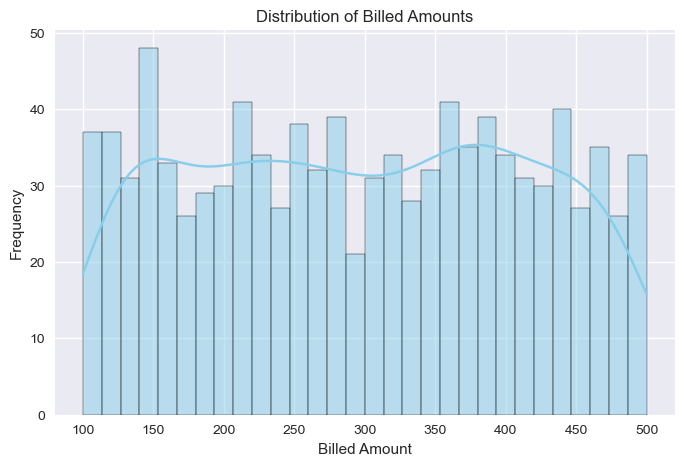

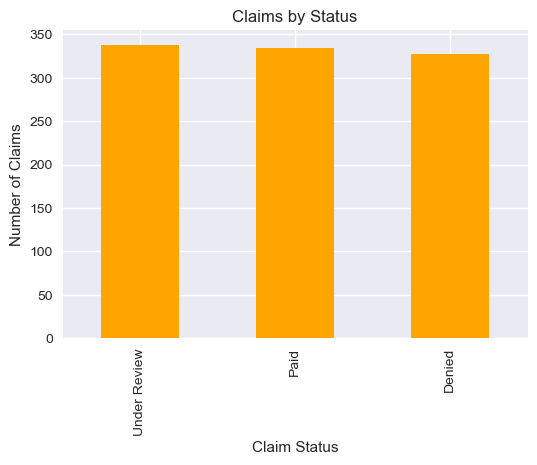

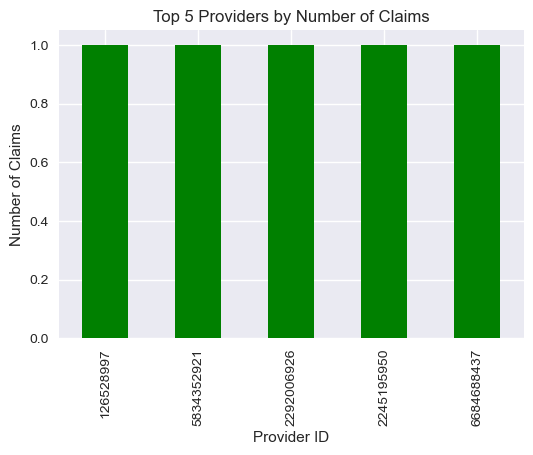


Processed data saved as processed_claims_data.csv


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# Load Dataset from GitHub
# -----------------------------
file_path = "https://raw.githubusercontent.com/shivaprasad1808/Healthcare_claims_dataset/main/claims_data.xlsx"
df = pd.read_excel(file_path)

# -----------------------------
# Clean Column Names
# -----------------------------
# Remove spaces and replace with underscores
df.columns = df.columns.str.strip().str.replace(" ", "_")

# -----------------------------
# Initial Data Inspection
# -----------------------------
print("First 5 rows of dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nColumn Names:")
print(df.columns.tolist())

# -----------------------------
# Data Cleaning
# -----------------------------
# Remove duplicate rows
df.drop_duplicates(inplace=True)

# Fill missing values
df.fillna(method="ffill", inplace=True)

# Convert Date_of_Service to datetime
df["Date_of_Service"] = pd.to_datetime(df["Date_of_Service"])

print("\nData cleaned successfully.")

# -----------------------------
# Basic Pattern Analysis
# -----------------------------

# Total number of claims
total_claims = len(df)
print("\nTotal Claims:", total_claims)

# Average billed amount
avg_billed = df["Billed_Amount"].mean()
print("Average Billed Amount:", round(avg_billed, 2))

# Maximum billed amount
max_billed = df["Billed_Amount"].max()
print("Highest Billed Amount:", max_billed)

# Claims by Claim_Status
print("\nClaims by Status:")
print(df["Claim_Status"].value_counts())

# -----------------------------
# Provider Analysis
# -----------------------------
top_providers = df["Provider_ID"].value_counts().head(5)
print("\nTop 5 Providers by Number of Claims:")
print(top_providers)

# -----------------------------
# High-Cost Claims Detection
# -----------------------------
high_cost_threshold = df["Billed_Amount"].quantile(0.95)
high_cost_claims = df[df["Billed_Amount"] > high_cost_threshold]
print("\nNumber of High-Cost Claims:", len(high_cost_claims))

# -----------------------------
# Visualization Section
# -----------------------------

# Billed Amount Distribution
plt.figure(figsize=(8,5))
sns.histplot(df["Billed_Amount"], bins=30, kde=True, color="skyblue")
plt.title("Distribution of Billed Amounts")
plt.xlabel("Billed Amount")
plt.ylabel("Frequency")
plt.show()

# Claims by Status Bar Chart
plt.figure(figsize=(6,4))
df["Claim_Status"].value_counts().plot(kind="bar", color="orange")
plt.title("Claims by Status")
plt.xlabel("Claim Status")
plt.ylabel("Number of Claims")
plt.show()

# Top Providers Chart
plt.figure(figsize=(6,4))
df["Provider_ID"].value_counts().head(5).plot(kind="bar", color="green")
plt.title("Top 5 Providers by Number of Claims")
plt.xlabel("Provider ID")
plt.ylabel("Number of Claims")
plt.show()

# -----------------------------
# Save Processed Data
# -----------------------------
df.to_csv("processed_claims_data.csv", index=False)
print("\nProcessed data saved as processed_claims_data.csv")
